---
# Proyecto 1 Estadistica 
César Luis Moreno González - 201924899
Luis Rubiano - 202013482

---


 Instalacion de Pynverse para el manejo de $F^{-1}$

In [ ]:
pip install pynverse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 0. Importación de Librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pynverse import inversefunc
import math
from numpy import log as ln
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# 1. Definición de variables

In [ ]:
# Número de muestras
M = 500
# Tamaño de las muestras
N = [50,100,200,500,1000]
# Tamaño de la muestra para las primeras partes
n0 = 10000
# Valor de Theta
theta1 = 2.7
theta2 = 7.5

# 2. Generación de graficos

In [ ]:
## Función de distribución de Rayleigh con theta1 = 2.7
dist_rayleigh = (lambda x: 1 - math.exp(-((x**2)/(2*(theta1**2)))))
inv_rayleigh = inversefunc(dist_rayleigh)

## Función de distribución de Rayleigh con theta1 = 7.5
dist_rayleigh2 = (lambda x: 1 - math.exp(-((x**2)/(2*(theta2**2)))))
inv_rayleigh2 = inversefunc(dist_rayleigh2)

In [ ]:
# Función para la generación de muestras con distribución uniforme
def gen_uniform(n):
  X = []
  for i in range(n):
    X_i = np.random.uniform(0,1)
    X.append(X_i)
  return X

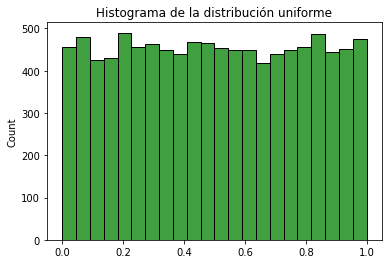

In [ ]:
plt.title("Histograma de la distribución uniforme")
sns.histplot(gen_uniform(n0), color = "green")
plt.show()

In [ ]:
# Generación de las muestras con distribución Rayleigh 
# n es el número de muestras
# fun corresponde a F inversa
def generate_samples(n, fun):
  X = gen_uniform(n)
  X_R = []
  for i in range(n):
    X_Ri = fun(X[i])
    X_R.append(X_Ri)
  return np.array(X_R)
# Generamos las muestras de theta1 = 2.7
X_R = generate_samples(n0,inv_rayleigh)
# Generamos las muestras de theta2 = 7.5
X_R2 = generate_samples(n0,inv_rayleigh2)

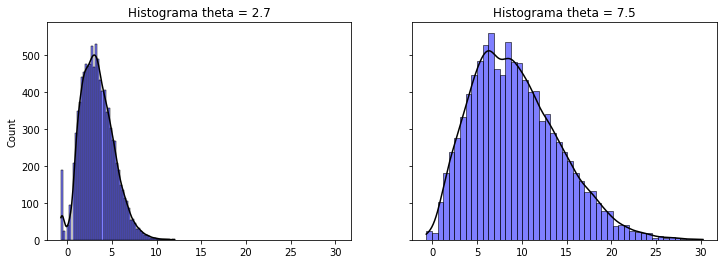

In [ ]:

fig, axes = plt.subplots(1, 2, figsize = (12,4), sharex=True, sharey=True)

# Histograma theta = 2.7
axis = sns.histplot(X_R, ax = axes[0], color ="blue", kde=True)
axes[0].set_title("Histograma theta = 2.7")
axis.lines[0].set_color('black')

# Histograma theta = 7.5
axes[1].set_title("Histograma theta = 7.5")
axis = sns.histplot(X_R2, color = "blue", kde=True)
axis.lines[0].set_color('black')
plt.show()

Text(0.5, 1.0, 'Probability Plot - theta = 7.5')

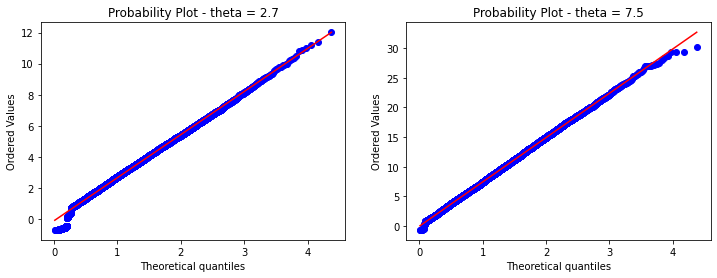

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12,4))
# q-q plot Rayleigh(theta = 2.7)
_1 = stats.probplot(X_R, dist="rayleigh", plot=axes[0])
axes[0].set_title("Probability Plot - theta = 2.7")

# q-q plot Rayleigh(theta = 7.5
_2 = stats.probplot(X_R2, dist="rayleigh", plot=axes[1])
axes[1].set_title("Probability Plot - theta = 7.5")

# 3. Estimadores

In [ ]:
#Estimador de momentos
def me(X):
  est = sum(X)/len(X)*math.sqrt(2/math.pi)
  return est

#Estimador de Maxíma Verosimilitud
def mle(X,n):
  S2 = [X[i]**2 for i in range(len(X))]
  est = math.sqrt(sum(S2)/(2*n))
  return est
  
# Calculo de las estimaciones
# El e[0] corresponde al estimador de momentos
# El e[1] corresponde al estimador de maxima verosimilitud
def estimate(n,fun):
  e = [[],[]]
  for i in range(M):
    X = generate_samples(n,fun)
    e[0].append(me(X))
    e[1].append(mle(X,n))
  return e


In [ ]:
# Calculamos las estimaciones del caso theta1 = 2.7
data_boxplots = []
for num in N:
  data_boxplots.append(estimate(num,inv_rayleigh))

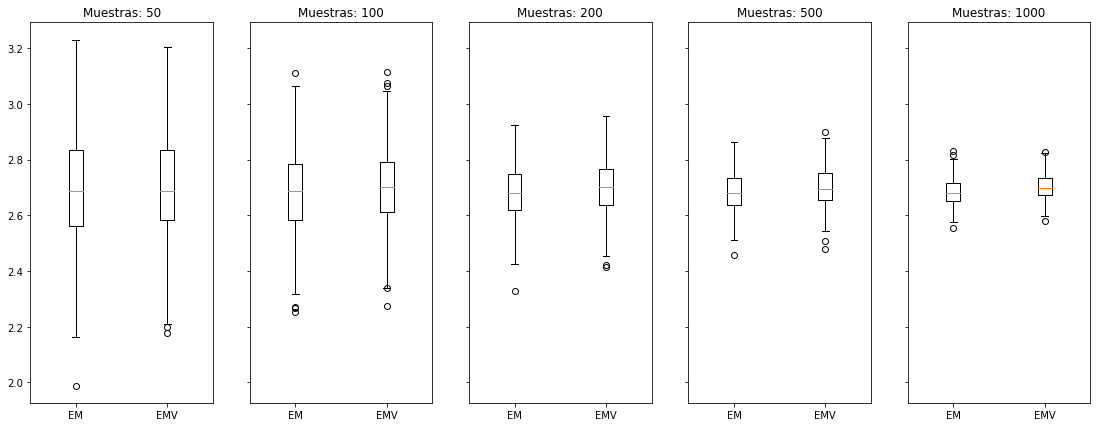

In [ ]:

# Generamos los boxplots
f, axs = plt.subplots(1, 5, figsize = (19,7),sharey = True)
for i in range(len(data_boxplots)):
  axs[i].set_xticklabels(['EM', 'EMV'])
  axs[i].boxplot(data_boxplots[i])
  axs[i].set_title("Muestras: " + str(N[i]))

In [ ]:
# Calculamos las estimaciones del caso theta2 = 7.5
data_boxplots2 = []
for num in N:
  data_boxplots2.append(estimate(num,inv_rayleigh2))

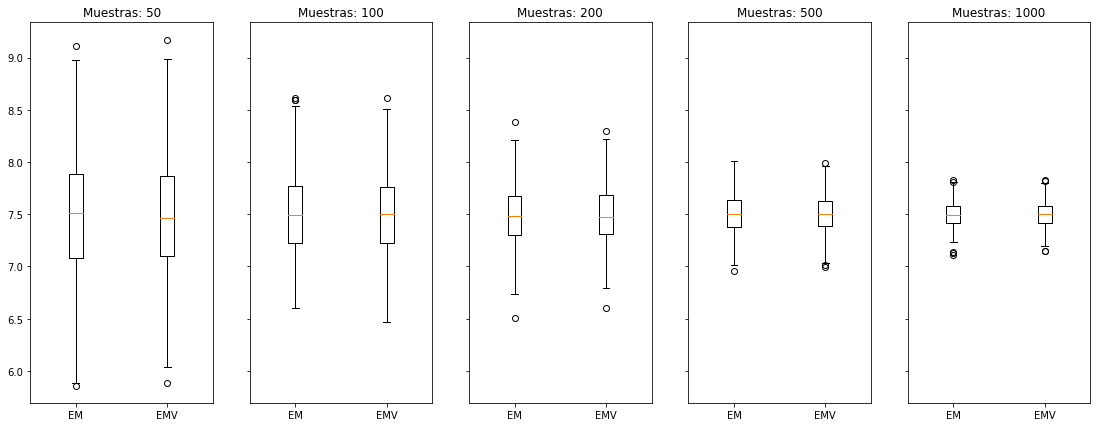

In [ ]:
# Generamos los boxplots
f, axs = plt.subplots(1, 5, figsize = (19,7),sharey = True)
for i in range(len(data_boxplots2)):
  axs[i].set_xticklabels(['EM', 'EMV'])
  axs[i].boxplot(data_boxplots2[i])
  axs[i].set_title("Muestras: " + str(N[i]))



# 4. Sesgo y ECM

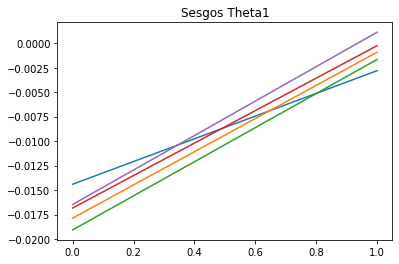

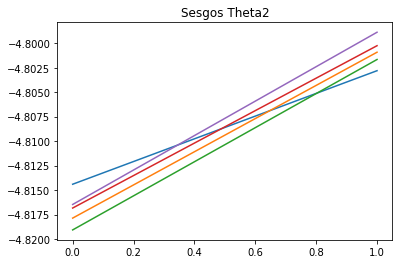

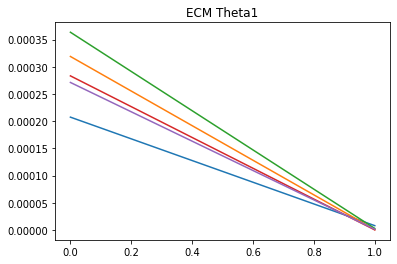

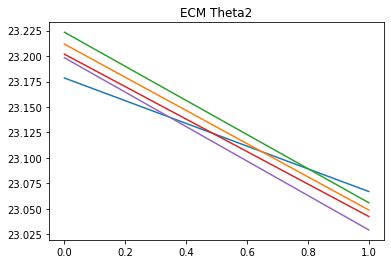

In [ ]:
#Calculamos los sesgos para cada estimador
def calcular_sesgos(data, t):
  sesgos = [[],[]]
  for j in range(2):
    for i in range(len(N)):
      avg = sum(data[i][j])/len(data[i][j])
      sesgo = avg - t
      sesgos[j].append(sesgo)
  return sesgos

sesgos_theta1 = calcular_sesgos(data_boxplots,theta1)
plt.title('Sesgos Theta1')
plt.plot(sesgos_theta1)
plt.show()
sesgos_theta2 = calcular_sesgos(data_boxplots,theta2)
plt.title('Sesgos Theta2')
plt.plot(sesgos_theta2)
plt.show()


#Calculamos el ECM
#usando el hecho de que ECM(theta_estimada) = Var(theta_estimada) + sesgo(theta_estimada,theta)^2
#Aqui usamos el estimador usual para la varianza (varianza muestral)
def calcular_ECM(data, t, sesgos):
  ECMs = [[],[]]
  for j in range(2):
    for i in range(len(N)):
        avg = sum(data[i][j])/len(data[i][j])
        ECM = (sesgos[j][i])**2 + 1/(len(data[i][j])-1) * sum([k - avg for k in data[i][j]])**2
        ECMs[j].append(ECM)
  return ECMs 

ECMs_theta1 = calcular_ECM(data_boxplots,theta1,sesgos_theta1)
ECMs_theta2 = calcular_ECM(data_boxplots,theta2,sesgos_theta2)
plt.title('ECM Theta1')
plt.plot(ECMs_theta1)
plt.show()
plt.title('ECM Theta2')
plt.plot(ECMs_theta2)
plt.show()

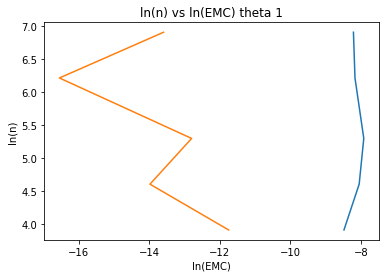

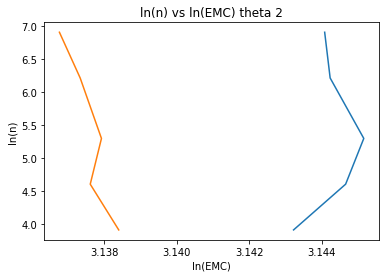

In [ ]:
#Aquí graficamos ln(n) contra ln(EMC) para cada theta

plt.title("ln(n) vs ln(EMC) theta 1")
plt.plot([ln(i) for i in ECMs_theta1[0]],[ln(i) for i in N])
plt.plot([ln(i) for i in ECMs_theta1[1]],[ln(i) for i in N])
plt.xlabel('ln(EMC)')
plt.ylabel('ln(n)')
plt.show()

plt.title("ln(n) vs ln(EMC) theta 2")
plt.plot([ln(i) for i in ECMs_theta2[0]],[ln(i) for i in N])
plt.plot([ln(i) for i in ECMs_theta2[1]],[ln(i) for i in N])
plt.xlabel('ln(EMC)')
plt.ylabel('ln(n)')
plt.show()

# 5. Conclusiones:

Los resultados sugieren que los estimadores son asintoticamente insesgados ya que cuando n tiene a infinito el EMC también tiende a infinito, esto es lo mismo a decir que el sesgo tiende a 0 cuando n tiende a infinito. Bajo estos resultados, existe la posibilidad de que los estimadores sean consistentes.

De igual manera parece que theta 1 es mejor estimador dado que su EMC es mejor para cualquier valor de n